### 0719 DOING frame consistency

## ELAN Evaluation metrics (Dim delta, depth, alpha, Dim consistency)

In [14]:
from library.ron_utils import *
import matplotlib.pyplot as plt
from library.ron_utils import iou_2d, TrackingObject
from ELAN_label_trackID import tracking_obj_by_labels
from ELAN_EVAL import evaluation

'''
cam_to_img = np.array([
        [ 1.418667e+03, 0.000000e+00, 6.4e+02,0],
        [ 0.000000e+00, 1.418667e+03, 3.6e+02,0],
        [ 0.000000e+00, 0.000000e+00, 1.000000e+00,0]])
'''

def ELAN_eval_metrics(result_root):
    valset = [x.strip() for x in open('Elan_3d_box/ImageSets/val.txt').readlines()]
    dim_GT = list()
    dim_ELAN = list()
    depth_GT = list()
    depth_ELAN = list()
    alpha_GT = list()
    alpha_ELAN = list()
    #set_ = set()
    for id_ in valset:
        gt_lines = [x.strip() for x in open(f'Elan_3d_box/renew_label_obj/{id_}.txt').readlines()]
        gt_objects = [TrackingObject(line) for line in gt_lines if line.split()[0].lower()=='car']
        
        for obj in gt_objects:
            #set_.add(obj.id)
            dim_GT.append(obj.dims[0])
            depth_GT.append(obj.locs[0][2])
            alpha_GT.append(obj.alphas[0])
            
        pred_lines = [x.strip() for x in open(f'{result_root}/label_2/{id_}.txt').readlines()]
        pred_objects = [TrackingObject(line) for line in pred_lines if line.split()[0].lower()=='car']
        for obj in pred_objects:
            dim_ELAN.append(obj.dims[0])
            depth_ELAN.append(obj.locs[0][2])
            alpha_ELAN.append(obj.alphas[0])
    
    #print('OBJECT NUM', len(set_))
    #print(set_)
    dim_GT = np.array(dim_GT)
    dim_ELAN = np.array(dim_ELAN)
    depth_GT = np.array(depth_GT)
    depth_ELAN = np.array(depth_ELAN)
    alpha_GT = np.array(alpha_GT)
    alpha_ELAN = np.array(alpha_ELAN)

    depth_diff = depth_GT-depth_ELAN
    alpha_diff = np.cos(alpha_GT - alpha_ELAN)
    dim_diff = np.mean(abs(dim_GT-dim_ELAN), axis=0)
    print(f'[DIM diff] H:{dim_diff[0]:.4f}, W:{dim_diff[1]:.4f}, L:{dim_diff[2]:.4f}')
    
    print(f'[Alpha diff] abs_mean: {1-alpha_diff.mean():.4f}')
    plt.hist(alpha_diff)
    plt.show()
    print(f'[Depth diff] abs_mean: {abs(depth_diff).mean():.4f}')
    print('[Depth error]')
    box_depth_error_calculation(depth_GT, depth_ELAN, 5)

========0720/BL_B4_N0========
[DIM diff] H:0.2205, W:0.1631, L:0.6804
[Alpha diff] abs_mean: 0.2245


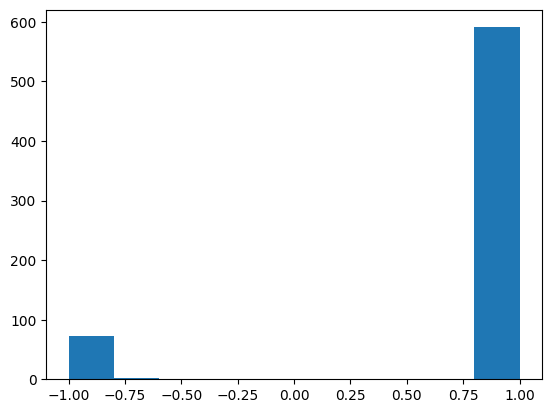

[Depth diff] abs_mean: 4.8813
[Depth error]
num of Car: 665
	num of depth 0-10: 0 
	num of depth 10-20: 68   abs_delta mean:3.046m, Out of 5m: 11
	num of depth 20-30: 142   abs_delta mean:3.765m, Out of 5m: 40
	num of depth 30-40: 259   abs_delta mean:4.236m, Out of 5m: 85
	num of depth 40-50: 95   abs_delta mean:6.668m, Out of 5m: 50
	num of depth 50-60: 50   abs_delta mean:8.223m, Out of 5m: 29
	num of depth 60+: 51     abs_delta mean:7.109m, Out of 5m: 30
[Total] mean:4.881, std:4.555

========0720/V_dim_B4_N0========
[DIM diff] H:0.1745, W:0.1414, L:0.5205
[Alpha diff] abs_mean: 0.2215


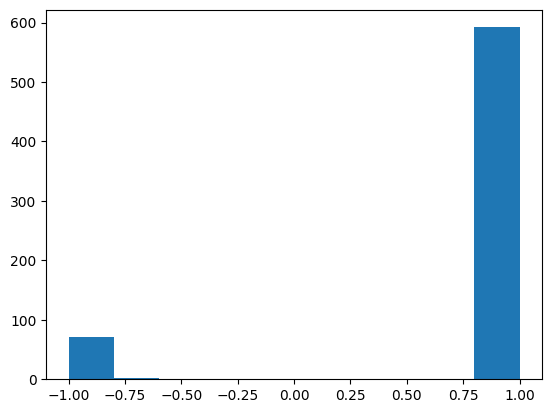

[Depth diff] abs_mean: 4.5878
[Depth error]
num of Car: 665
	num of depth 0-10: 0 
	num of depth 10-20: 68   abs_delta mean:2.998m, Out of 5m: 9
	num of depth 20-30: 142   abs_delta mean:3.598m, Out of 5m: 39
	num of depth 30-40: 259   abs_delta mean:3.784m, Out of 5m: 71
	num of depth 40-50: 95   abs_delta mean:6.776m, Out of 5m: 51
	num of depth 50-60: 50   abs_delta mean:7.271m, Out of 5m: 25
	num of depth 60+: 51     abs_delta mean:6.841m, Out of 5m: 31
[Total] mean:4.588, std:4.524

========0720/V_alpha_B4_N0========
[DIM diff] H:0.1417, W:0.1310, L:0.4727
[Alpha diff] abs_mean: 0.0234


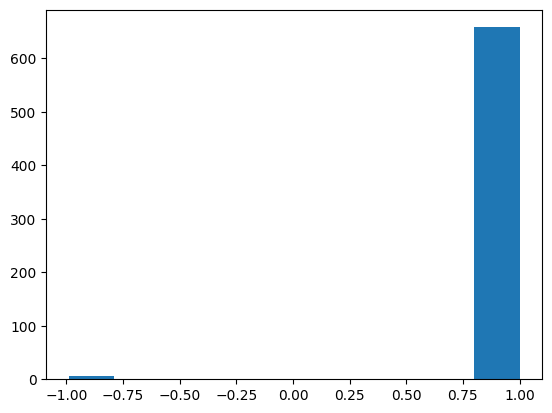

[Depth diff] abs_mean: 3.8236
[Depth error]
num of Car: 665
	num of depth 0-10: 0 
	num of depth 10-20: 68   abs_delta mean:1.542m, Out of 5m: 1
	num of depth 20-30: 142   abs_delta mean:3.195m, Out of 5m: 36
	num of depth 30-40: 259   abs_delta mean:2.824m, Out of 5m: 50
	num of depth 40-50: 95   abs_delta mean:5.217m, Out of 5m: 34
	num of depth 50-60: 50   abs_delta mean:7.798m, Out of 5m: 24
	num of depth 60+: 51     abs_delta mean:7.198m, Out of 5m: 31
[Total] mean:3.824, std:4.369

========0720/V_dim_alpha_B4_N0========


FileNotFoundError: [Errno 2] No such file or directory: '0720/V_dim_alpha_B4_N0/label_2/001606.txt'

In [15]:
# BL_IMAGENET BL_ELAN
# video_IMAGENET video_ELAN
date = '0720/'
N0_folders = ['BL_B4_N0', 'V_dim_B4_N0', 'V_alpha_B4_N0', 'V_dim_alpha_B4_N0']
N1_folders = ['BL_B4_N1', 'V_dim_B4_N1', 'V_alpha_B4_N1', 'V_dim_alpha_B4_N1']
is_group = False
for f in N0_folders:
    tmp_f = date + f
    if is_group:
        tmp_f += '_G_W10'
    print(f'========{tmp_f}========')
    ELAN_eval_metrics(tmp_f)
    print()


## Eval result : improvement of objects

In [94]:
print(len(V_labels))

0


In [100]:
import glob
trainset = [x.strip() for x in open('Elan_3d_box/ImageSets/train.txt').readlines()]
valset = [x.strip() for x in open('Elan_3d_box/ImageSets/val.txt').readlines()]
val_images = sorted(glob.glob('Elan_3d_box/image_2/*.png'))[-1*len(valset):] 
GT_labels = sorted(glob.glob('Elan_3d_box/renew_label/*.txt'))[-1*len(valset):]

# video_ELAN video_IMAGENET
V_labels = sorted(glob.glob('video_ELAN/label_2/*.txt'))[-1*len(valset):]
# BL_ELAN BL_IMAGENET
BL_labels = sorted(glob.glob('BL_ELAN/label_2/*.txt'))[-1*len(valset):]
assert len(valset) == len(V_labels), 'video_label length diff'
assert len(valset) == len(BL_labels), 'BL_label length diff'

GT_tracking_dict = tracking_obj_by_labels(GT_labels, val_images, WRITE_FILE=False)
V_tracking_dict = tracking_obj_by_labels(V_labels, val_images, WRITE_FILE=False)
BL_tracking_dict = tracking_obj_by_labels(BL_labels, val_images, WRITE_FILE=False)

0
500
0
500
0
500


In [101]:
other_count = 0
c = 0
dim_GT_1 = list()
dim_V_1 = list()
dim_BL_1 = list()

dim_GT_f = list()
dim_V_f = list()
dim_BL_f = list()

classes = ['motor', 'bus', 'car']
for key in GT_tracking_dict.keys():
    GT_obj = GT_tracking_dict[key]
    V_obj = V_tracking_dict[key]
    BL_obj = BL_tracking_dict[key]
    if GT_obj.class_.lower() != 'car':
        other_count += 1
        continue
    if (V_obj.box2d != BL_obj.box2d).all() or (V_obj.box2d != GT_obj.box2d).all() or (GT_obj.box2d != BL_obj.box2d).all():
        print('Box 2D diff:', key)
        break
        
    if len(GT_obj.frames) == 1:
        dim_GT_1.append(GT_obj.dims[0])
        dim_V_1.append(V_obj.dims[0])
        dim_BL_1.append(BL_obj.dims[0])
    else:
        dim_GT_f += GT_obj.dims
        dim_V_f += V_obj.dims
        dim_BL_f += BL_obj.dims
    c += 1 

In [102]:
dim_GT_1 = np.array(dim_GT_1)
dim_V_1 = np.array(dim_V_1)
dim_BL_1 = np.array(dim_BL_1)
dim_GT_f = np.array(dim_GT_f)
dim_V_f = np.array(dim_V_f)
dim_BL_f = np.array(dim_BL_f)

V_dim_diff_1 = np.mean(abs(dim_GT_1 - dim_V_1), axis=0)
BL_dim_diff_1 = np.mean(abs(dim_GT_1 - dim_BL_1), axis=0)
print('1 frame')

print(BL_dim_diff_1)
print(V_dim_diff_1)

V_dim_diff_f = np.mean(abs(dim_GT_f - dim_V_f), axis=0)
BL_dim_diff_f = np.mean(abs(dim_GT_f - dim_BL_f), axis=0)
print('multi- frame')
print(BL_dim_diff_f)
print(V_dim_diff_f)

1 frame
[0.236875 0.21625  0.817875]
[0.174875 0.178625 0.608625]
multi- frame
[0.21197952 0.15894198 0.66158703]
[0.1937372  0.13837884 0.56926621]


In [104]:
V_dim_diff_1 = abs(dim_GT_1 - dim_V_1)
BL_dim_diff_1 = abs(dim_GT_1 - dim_BL_1)
V_dim_diff_f = abs(dim_GT_f - dim_V_f)
BL_dim_diff_f = abs(dim_GT_f - dim_BL_f)

BL = np.concatenate((BL_dim_diff_1, BL_dim_diff_f))
print(np.mean(BL, axis=0))

V = np.concatenate((V_dim_diff_1, V_dim_diff_f))
print(np.mean(V, axis=0))


[0.21496997 0.16582583 0.68036036]
[0.19147147 0.14321321 0.57399399]
